# Auto MPG Data Set
**https://archive.ics.uci.edu/ml/datasets/Auto+MPG**


### Data dictionary
1. **mpg**: continuous
2. **cylinders**: multi-valued discrete
3. **displacement**: continuous
4. **horsepower**: continuous
5. **weight**: continuous
6. **acceleration**: continuous
7. **model year**: multi-valued discrete
8. **origin**: multi-valued discrete
9. **car name**: string (unique for each instance)



---

Import useful libraries for the analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import plot_dataframe_corr
from src.visualization import plot_target_corr
from src.visualization import multiple_plots

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
pd.set_option('display.precision', 1)

### **1. Load the dataset**

In [4]:
dataset_path = r".\data\auto-mpg.data"

In [5]:
colnames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

Open correctly the dataset

In [6]:
df = pd.read_csv(filepath_or_buffer=dataset_path, sep="\s+", na_values='?', names=colnames )
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


Make a copy of the dataset

In [7]:
df_copy = df.copy()

Display column names of the dataset

In [8]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

Display data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


 Count number of distinct elements in each column

In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
car_name        305
dtype: int64

Display the dataset dimensions

In [11]:
df.shape

(398, 9)

Find possible missing values

In [12]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### **2. Exploratory Data Analysis (EDA)**

Display basic statistics info

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.5,7.8,9.0,17.5,23.0,29.0,46.6
cylinders,398.0,5.5,1.7,3.0,4.0,4.0,8.0,8.0
displacement,398.0,193.4,104.3,68.0,104.2,148.5,262.0,455.0
horsepower,392.0,104.5,38.5,46.0,75.0,93.5,126.0,230.0
weight,398.0,2970.4,846.8,1613.0,2223.8,2803.5,3608.0,5140.0
acceleration,398.0,15.6,2.8,8.0,13.8,15.5,17.2,24.8
model_year,398.0,76.0,3.7,70.0,73.0,76.0,79.0,82.0
origin,398.0,1.6,0.8,1.0,1.0,1.0,2.0,3.0


Plot a correlation matrix

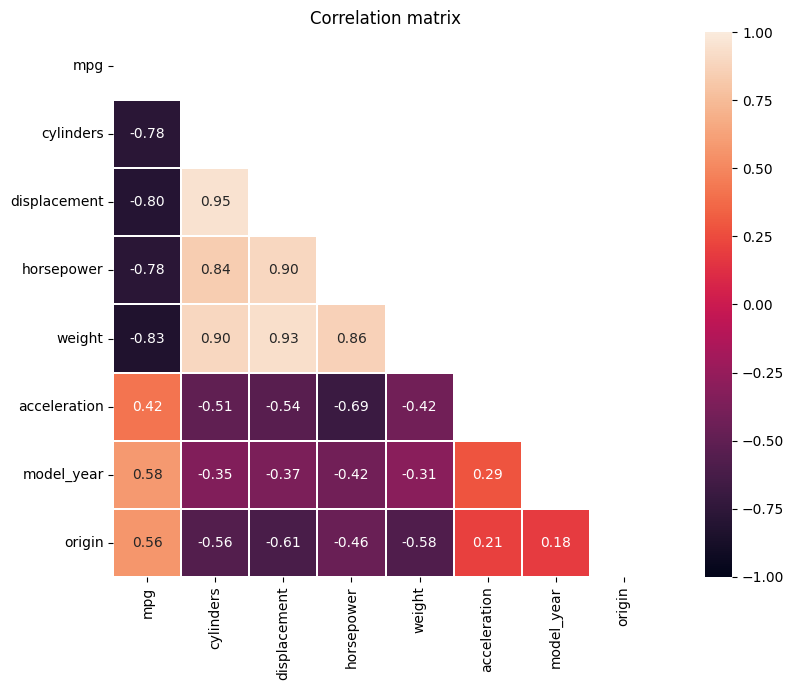

In [14]:
plot_dataframe_corr(data=df)

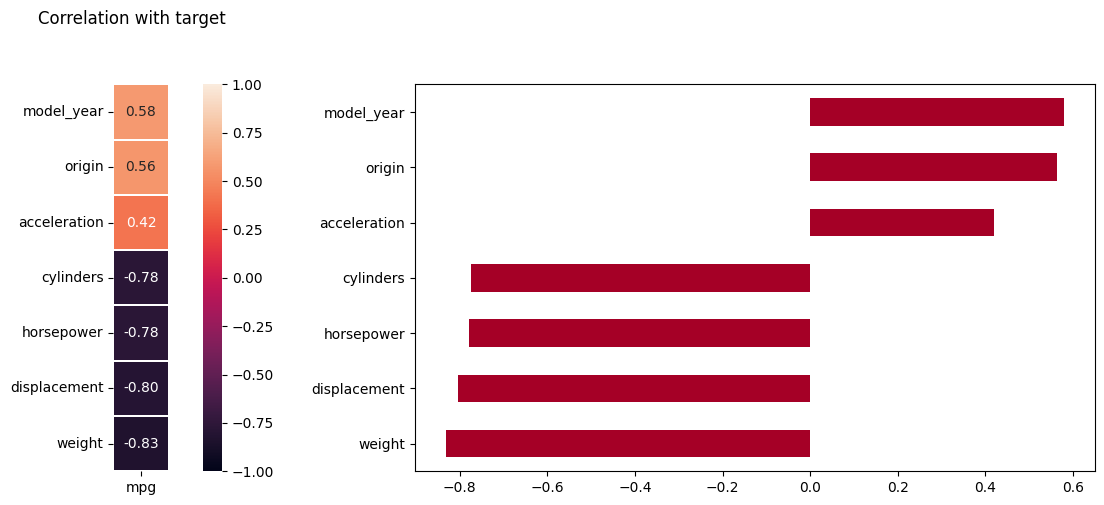

In [15]:
plot_target_corr(data=df, column='mpg')

Make a pairplot

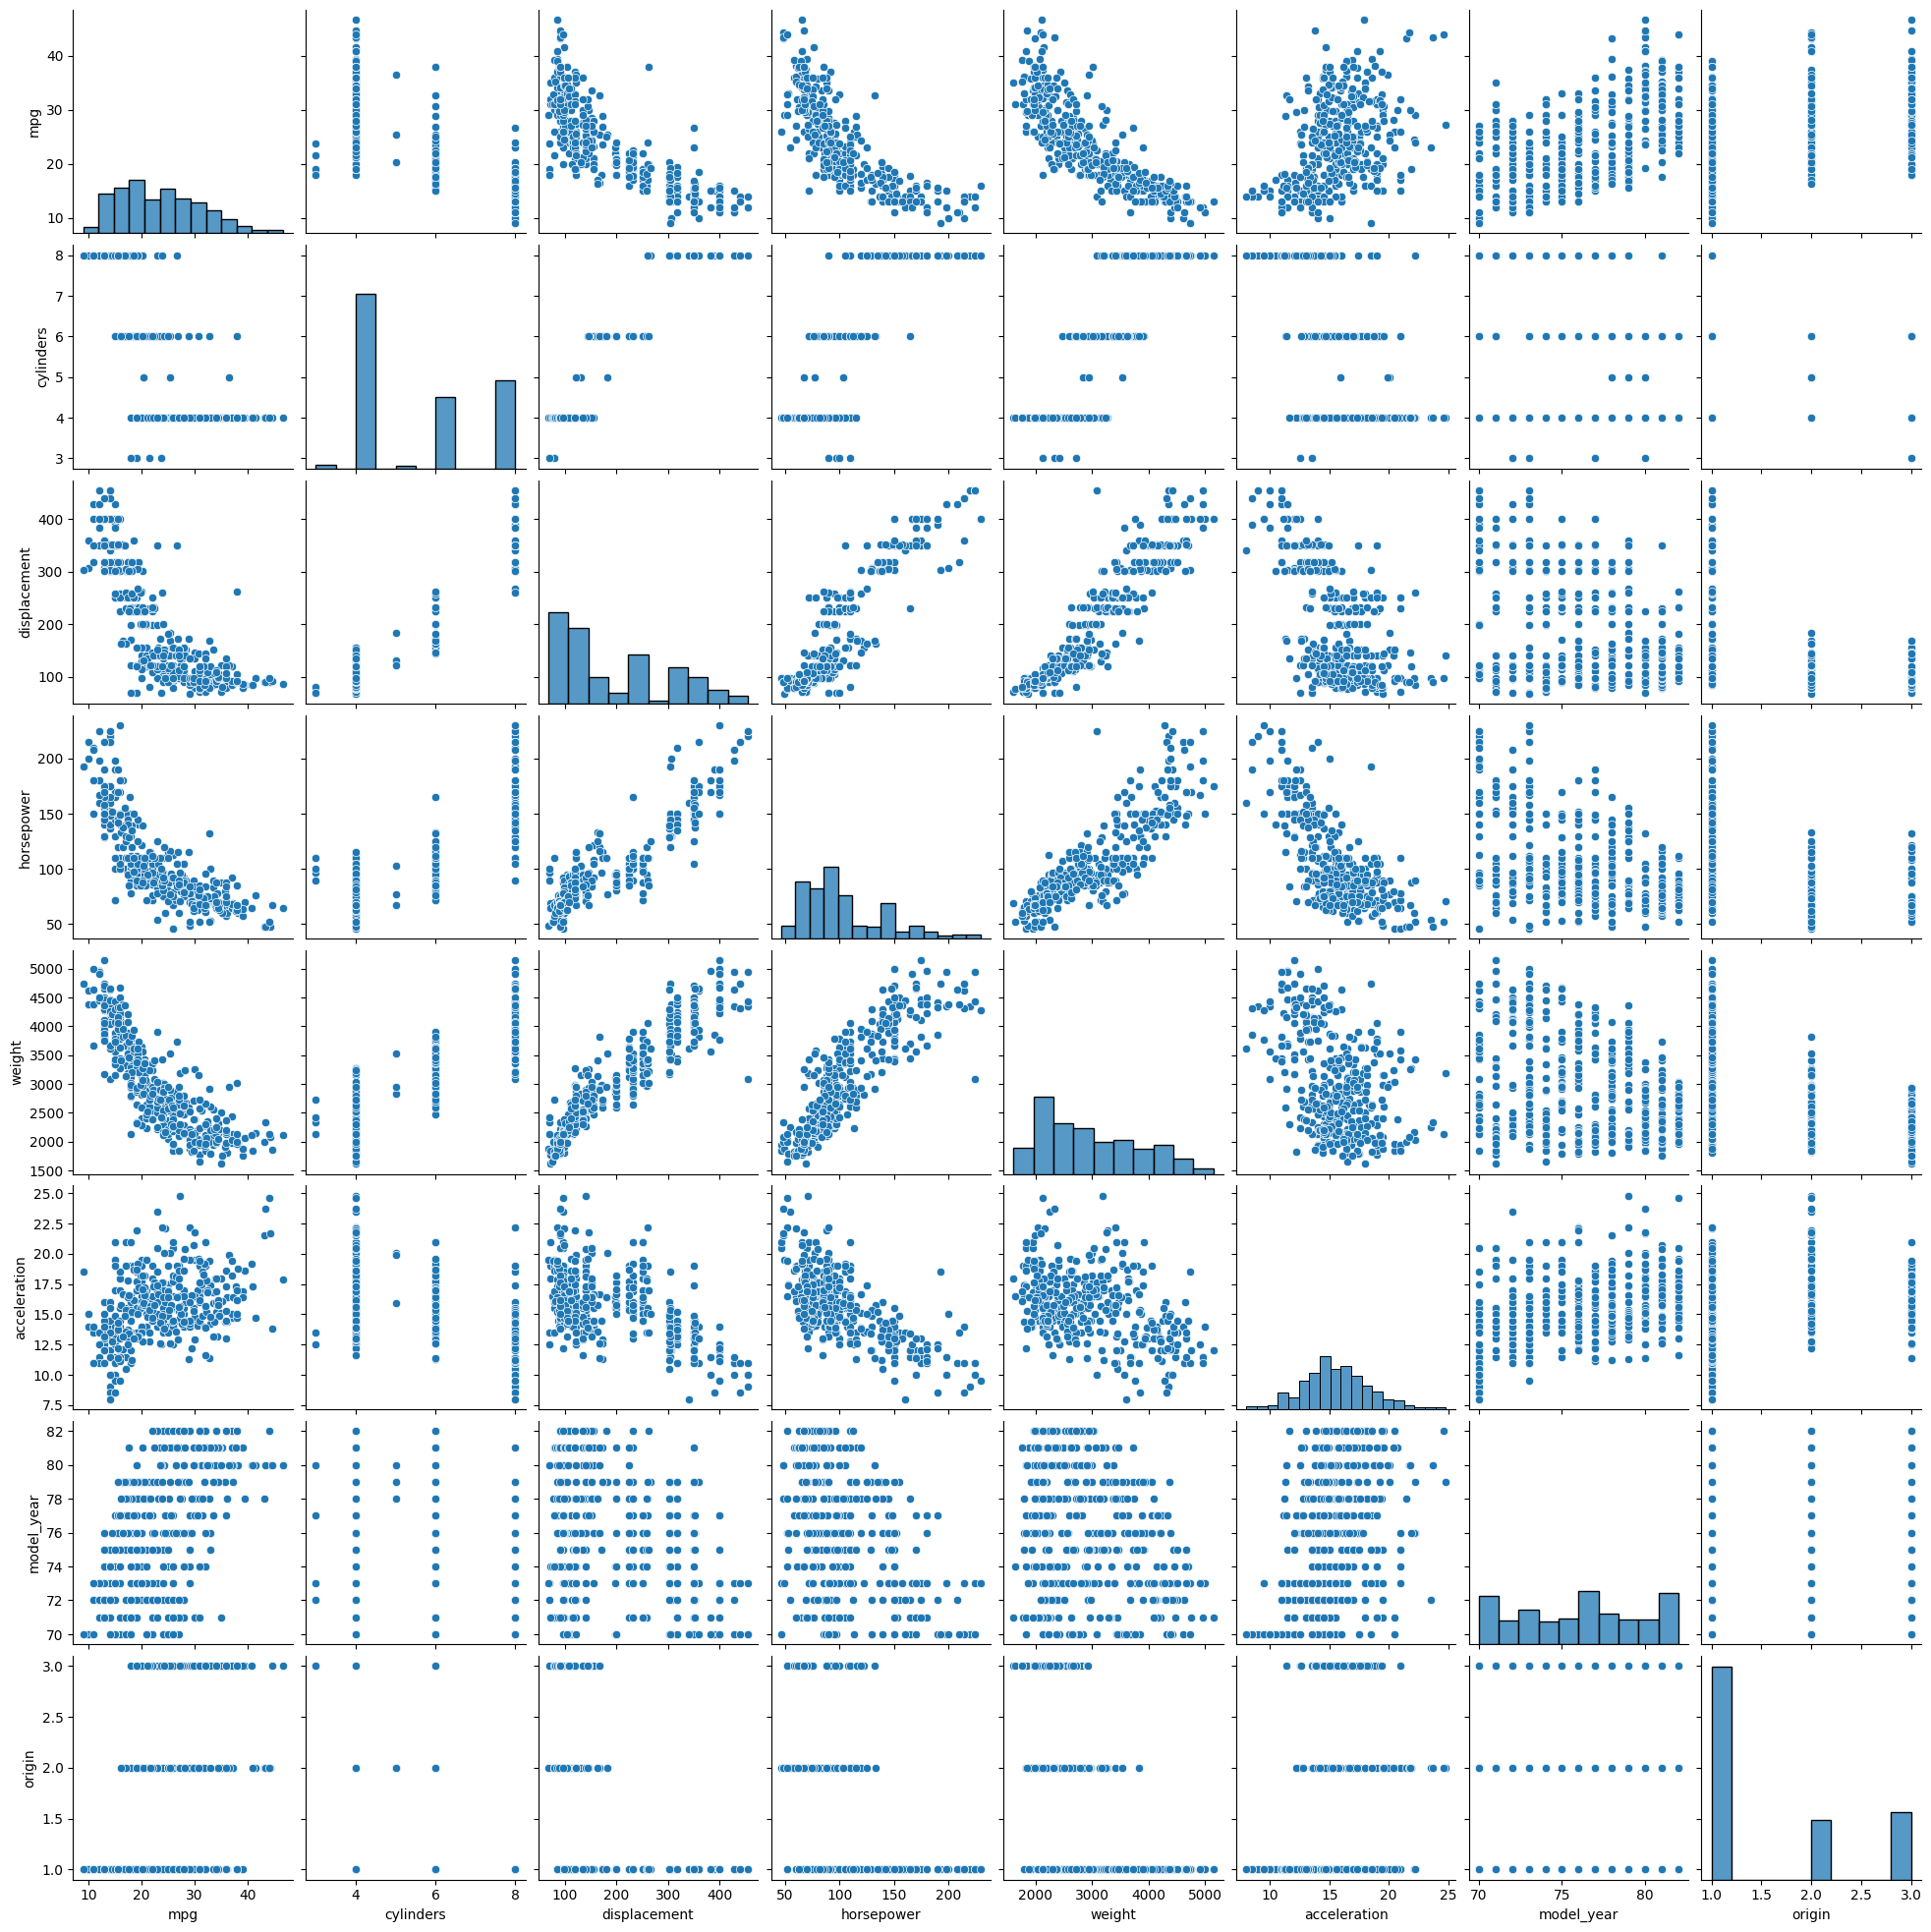

In [16]:
sns.pairplot(data = df)

**Multi-valued discrete variables**

In [17]:
discrete = ['cylinders', 'model_year', 'origin']

Countplots

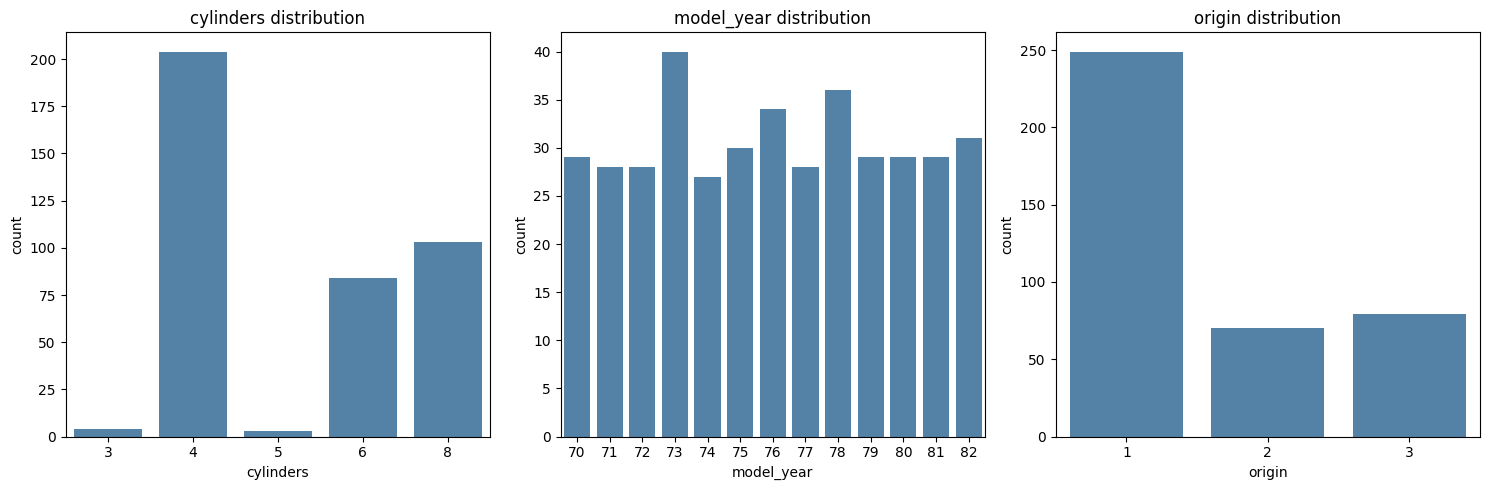

In [18]:
multiple_plots(data=df, columns=discrete, nrows=1, ncols=3, kind='countplot')

Boxplots with target

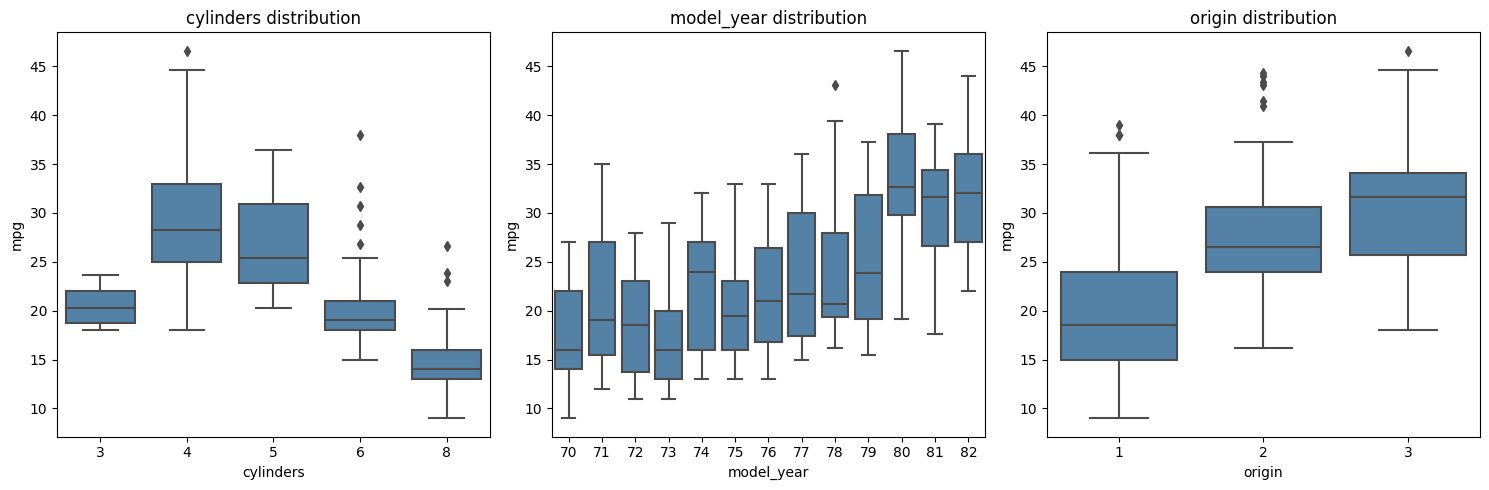

In [19]:
multiple_plots(data=df, columns=discrete, nrows=1, ncols=3, kind='boxplot', target='mpg')

**Continuous variables**

In [20]:
continuous = ['mpg','displacement', 'horsepower', 'weight', 'acceleration']

Scatterplots

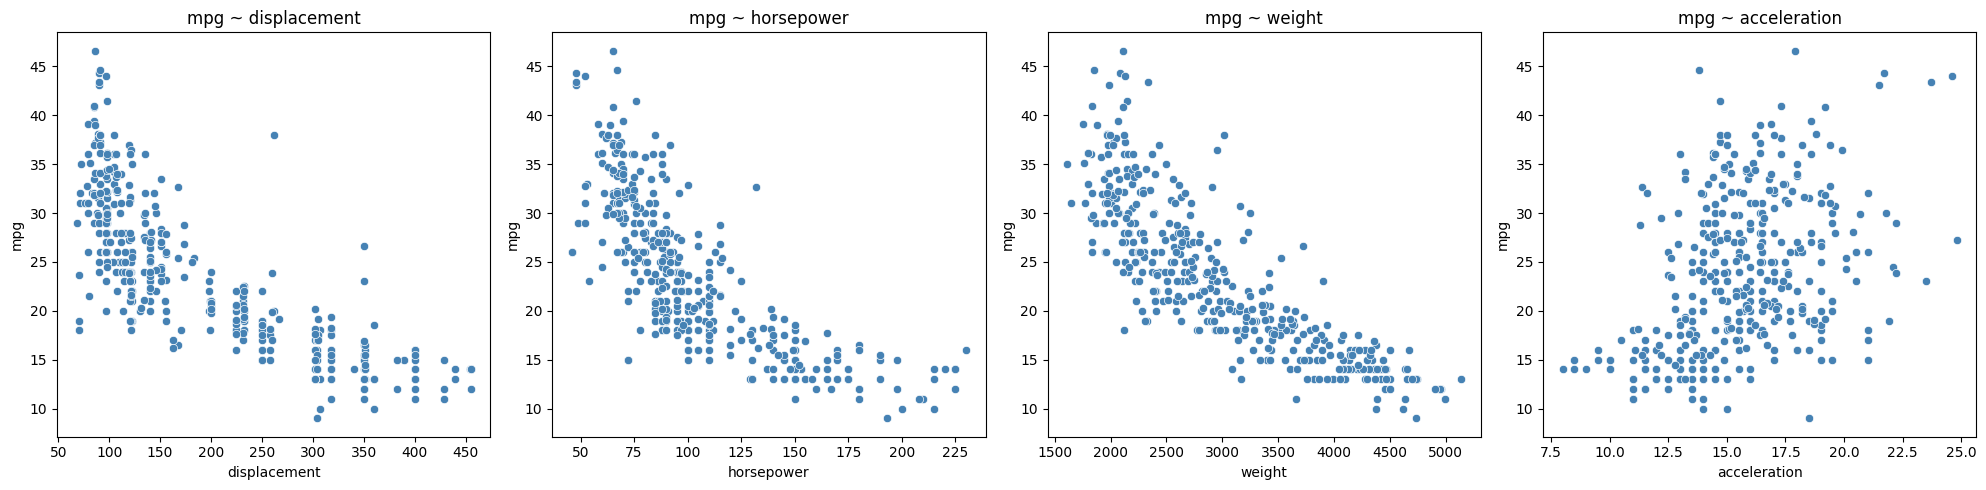

In [21]:
multiple_plots(data=df, columns=['displacement', 'horsepower', 'weight', 'acceleration'], nrows=1, ncols=4, kind='scatterplot', target='mpg')

Histplots

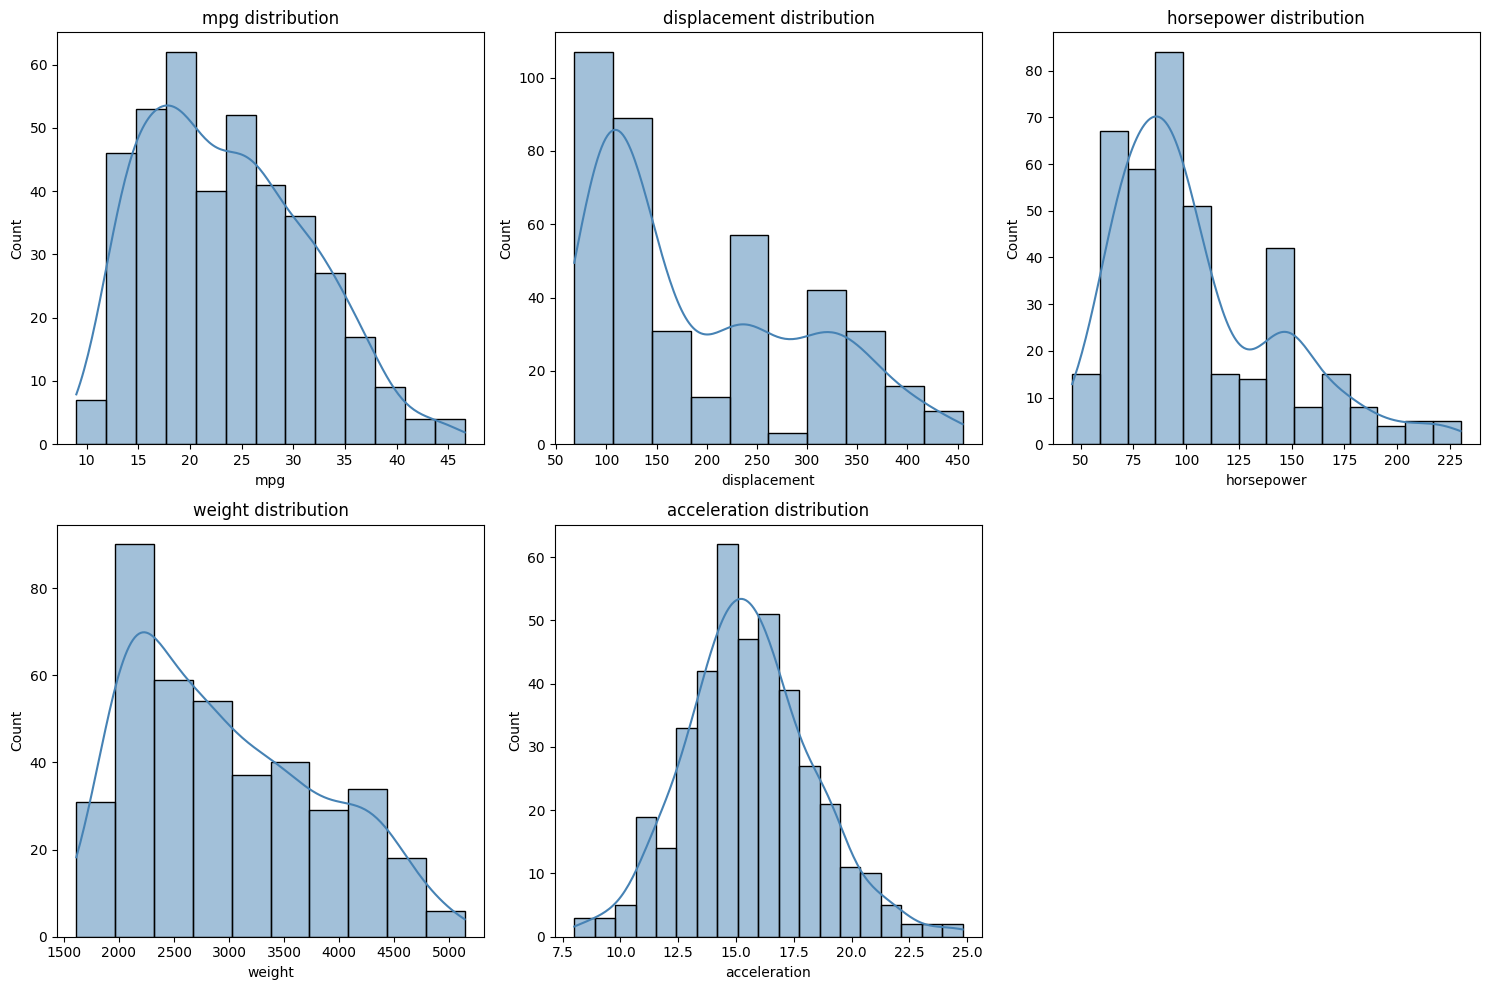

In [22]:
multiple_plots(data=df, columns=continuous, nrows=2, ncols=3, kind='histplot')

Boxplots

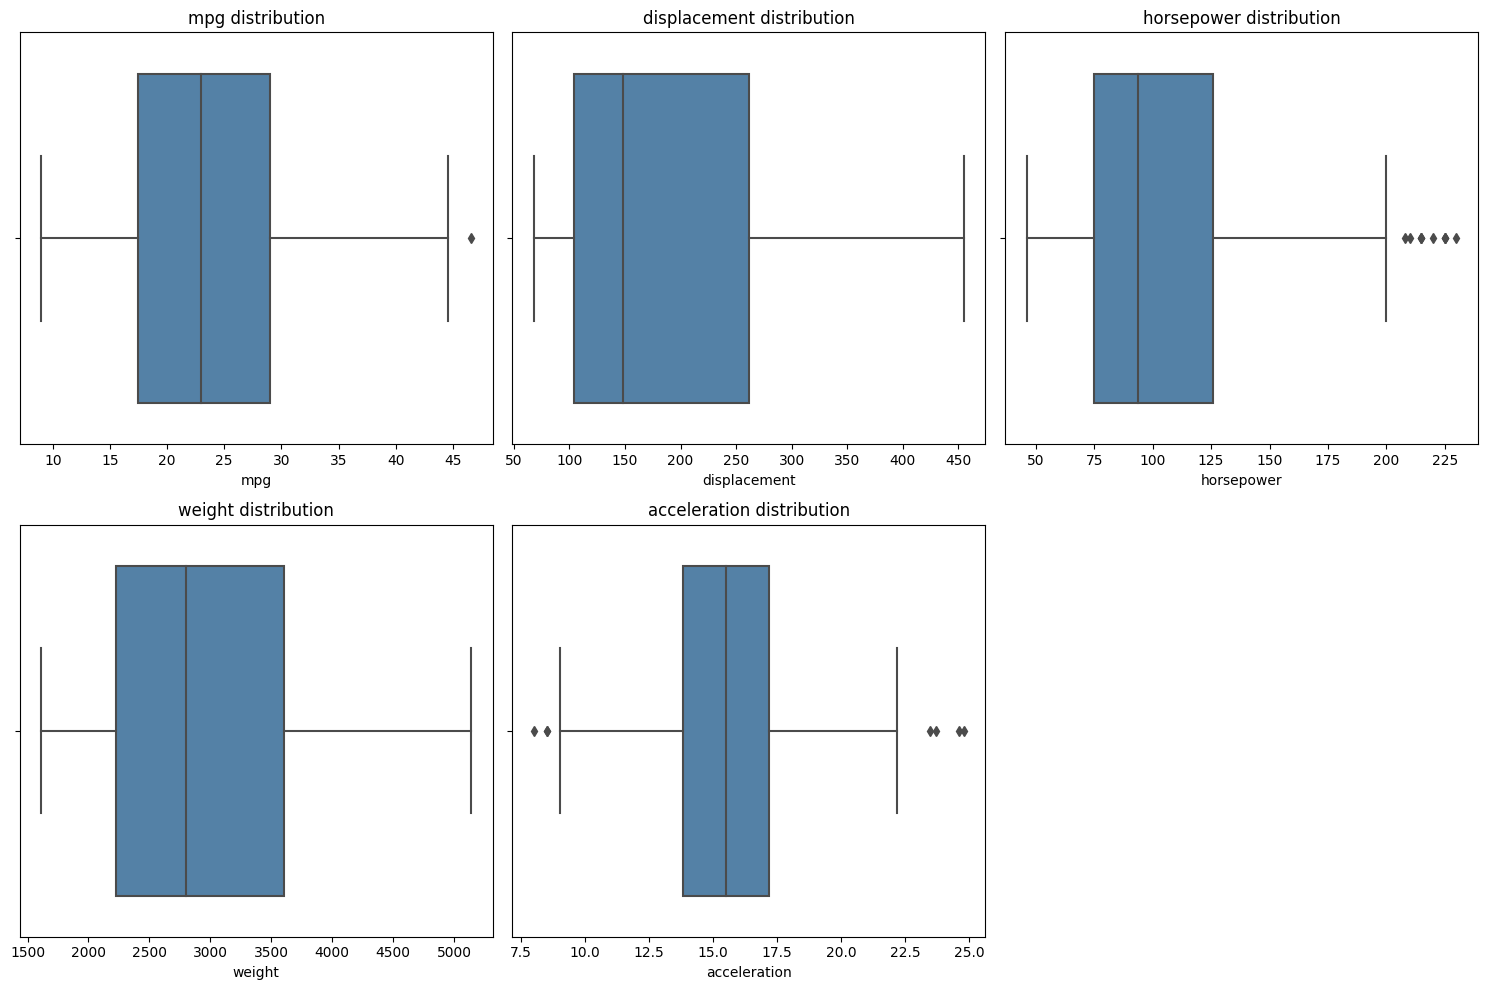

In [23]:
multiple_plots(data=df, columns=continuous, nrows=2, ncols=3, kind='boxplot')

### **3. Preparing the Data**

**Drop missing values**

In [24]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [25]:
# percentage of nan values
(df.isna().sum()/df.shape[0])*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      1.5
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
car_name        0.0
dtype: float64

In [26]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [27]:
df.shape

(392, 9)

In [28]:
%store df

Stored 'df' (DataFrame)
